In [47]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [48]:
def heatmap_from_metric(metric, metric_name):
  plt.imshow(metric)
  cbar = plt.colorbar()
  cbar.ax.get_yaxis().labelpad = 15
  cbar.ax.set_ylabel(metric_name, rotation=270)
  ticks = list(range(0, 10, 2))
  tick_labels = list(range(2012, 2022, 2))
  plt.xticks(ticks=ticks, labels=tick_labels)
  plt.yticks(ticks=ticks, labels=tick_labels)
  plt.xlabel("Train year")
  plt.ylabel("Test year")
  plt.tight_layout()
  plt.show()

In [49]:
def display_topics(model, feature_names, no_top_words):
  for topic_idx, topic in enumerate(model.components_):
    print("Topic " + str(topic_idx) + ": " + \
          " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [50]:
def get_topics(documents, no_topics, no_features):
  # LDA can only use raw term counts for LDA because it is a probabilistic graphical model
  tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
  tf = tf_vectorizer.fit_transform(documents)
  tf_feature_names = tf_vectorizer.get_feature_names_out()

  # Run LDA
  lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online',
                                  learning_offset=50., random_state=0).fit(tf)
  return lda, tf_feature_names

In [54]:
with open("../../WMTdata/token_splits/tokens_2020_25000000.txt", "r") as text_file:
  documents = text_file.readlines()[0].split("<s>")

model, tf_feature_names = get_topics(documents, no_topics=20, no_features=1000)
display_topics(model, tf_feature_names, no_top_words=50)

In [ ]:
num_years = 10
no_topics = 20
no_features = 1000
no_top_words = 50

topic_words = np.empty((num_years, no_topics, no_top_words), dtype=object)

for i in tqdm(range(num_years)):
  with open("../../WMTdata/token_splits/tokens_" + str(2012 + i) + "_25000000.txt", "r") as text_file:
    documents = text_file.readlines()[0].split("<s>")

  model, tf_feature_names = get_topics(documents, no_topics=no_topics, no_features=no_features)
  for topic_idx, topic in enumerate(model.components_):
    feature_names = [tf_feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    topic_words[i][topic_idx] = np.array(feature_names)

In [ ]:
num_intersections = np.zeros((num_years, num_years))

for i in range(num_years):
  for j in range(num_years):
    num_intersections[i][j] = len(np.intersect1d(topic_words[i], topic_words[j]))

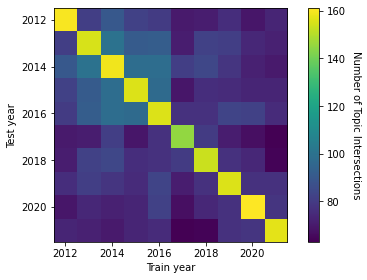

In [ ]:
heatmap_from_metric(num_intersections, "Number of Topic Intersections")